In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

## Extraer usuarios

In [2]:
# get users and mentions from the download files:
tweets_datas_path = ['dwnld_debate.json']#,
#                      'dwnld_1.json',
#                      'dwnld_2.json',
#                      'dwnld_3.json']                    
tw_id=[]
tw_user_id=[]
tw_user=[]
tw_text=[]
entities_long=[]
mentioned_ids=[]

for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
                if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
                    tw_text_loop=[tweet["extended_tweet"]["full_text"]]
                    tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                    entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                else:
                    if tweet["text"][0:2]=="RT":
                        if tweet["retweeted_status"]["truncated"]:
                            tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
                            tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                        else: 
                            tw_text_loop=[tweet["retweeted_status"]["text"]]
                            tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
                        if tweet["retweeted_status"]["is_quote_status"]:
                            tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                    else:
                        tw_text_loop=[tweet["text"]]
                mentioned_ids.append(list(set([ent["id_str"] for ent in tw_entities])))
                tw_text.append([tweet["id_str"],tw_text_loop])
            except:
                continue



    


In [3]:
print(len(tw_id),
      len(tw_user_id),
      len(tw_user),
      len(tw_text),
      len(entities_long),
      len(mentioned_ids))

42884 42884 42884 42880 171726 42880


In [4]:
tweets_ids=pd.DataFrame({"tw_id":tw_id,
              "tw_user_id":tw_user_id,
              "tw_user":tw_user
             })
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 16860


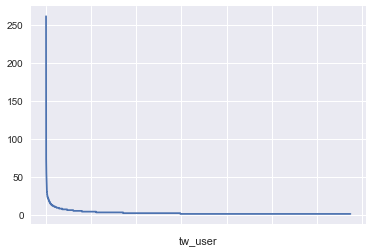

In [5]:
# ids_freqs.sort_values(by=['count'] , ascending=False)["count"]

ids_freqs.plot()# figsize=(16, 9))

C:\Users\Administrador\AppData\Local\conda\conda\envs\twdw\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


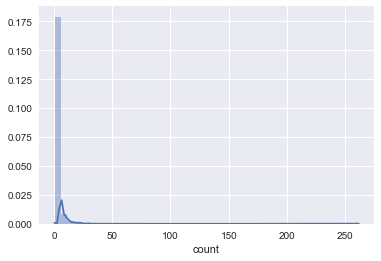

In [6]:
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    16860.000
mean         2.544
std          4.481
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        261.000
Name: count, dtype: float64

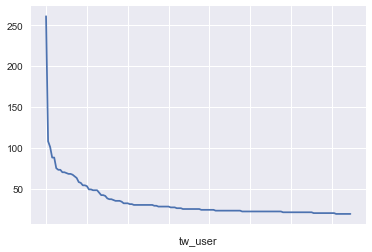

In [8]:
ids_freqs[:150].plot()# figsize=(16, 9))

In [15]:
ids_freqs.sort_values(ascending=False)[:60]
#ids_freqs.sort_values(by=['count'], ascending=False)["count"][:60]

tw_user
VotaPorGerman      261
AnyiciiTa_V        108
Silvana_R10        101
lennyelianam        88
AbCarrymar          88
Jimmy44989247       75
Mercedes_Avila2     73
MarianaLenis        73
lauv0014            70
carlos_karlosa      70
_PaulaRonderos      69
FROILANZ            68
EdgarJoseGaray      68
ivan_epm            67
spmunoz05           65
alfredoa271         63
ZONAALEX9864        58
laurapimienta4      57
roger5co            54
barreraastrid       54
lguzmangomez        53
CPLATAM             49
AlexandeRojasA      49
dorainesmp          48
luz_hania           48
TWITERM99417410     48
AmparoOrtegab       45
ValCe12             42
AlfredoNobel1       42
elmogollorevele     41
daniel56798181      38
Leonard89337902     37
macdonal5           37
NANACHAGU           36
nenoriega5          35
AntioquiaJuan       35
jaramillo_diana     35
JuanPAcero          34
lasillaenvivo       32
LORYROD             32
krlosgiraldo1       32
Bizarnik            31
chelyz29            31
JOH

In [16]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

5106

In [17]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [18]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 5105


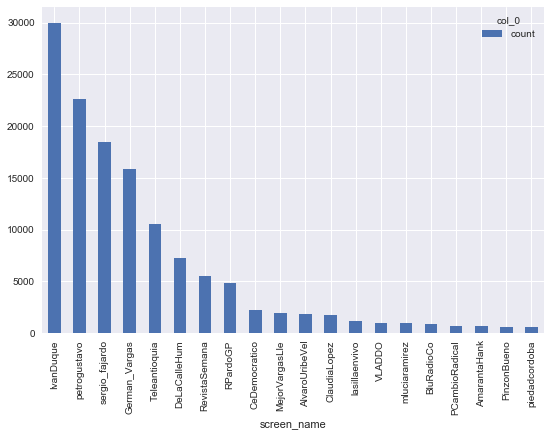

In [19]:
ments_freq[:20].plot(kind='bar', figsize=(9,6))

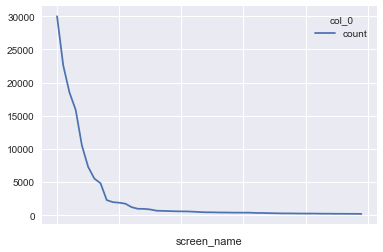

In [20]:
ments_freq[:50].plot()# figsize=(16, 9))

In [22]:
ments_freq[:20]#60

col_0,count
screen_name,
IvanDuque,30004
petrogustavo,22573
sergio_fajardo,18513
German_Vargas,15887
Teleantioquia,10524
DeLaCalleHum,7308
RevistaSemana,5530
RPardoGP,4823
CeDemocratico,2281


In [23]:
round(ments_freq.describe(),3)

col_0,count
count,5105.000
mean,33.639
std,663.045
min,1.000
25%,1.000
50%,2.000
75%,4.000
max,30004.000
